In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 驗證Lennard-Jones potential的最低點是落在r = r0的位置

In [2]:
# 輸入constant
Ep0 = 1
r0 = 1

# create the Lennard-Jones potential
def LJ(x):
    return Ep0*((r0/x)**(12)-2*(r0/x)**(6))

# Gradient Descent
## 互動式的輸入初始點，使結果自動趨近於極值

輸入起始點>> 0.7
誤差0.9999999999999787%
平均半徑為0.9900000000000002個r0


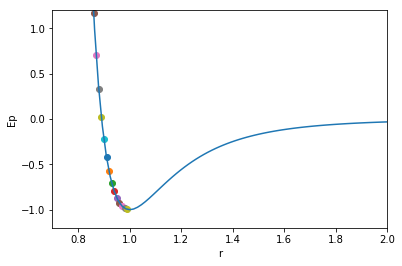

In [19]:
r = np.linspace(0.5, 2, 100)
Ep = LJ(r)

# 畫背景值
plt.plot(r, Ep)
plt.xlabel("r")
plt.ylabel("Ep")
plt.xlim(0.7, 2)
plt.ylim(-1.2, 1.2)

# 產生起始點(讓取值在0~10之間)
r_start = input("輸入起始點>> ")
r_start = float(r_start)
r_R = r_start+0.001
r_L = r_start-0.001
Ep_R = LJ(r_R)
Ep_L = LJ(r_L)

err = 1
while err > 0.01:
    
    # 取斜率
    slope = (Ep_R-Ep_L)/(r_R-r_L)
    
    # 設learning rate
    # 除以abs(slope)的原因為期望接近最低點(斜率會變緩)時移動距離變短
    η = 0.01/abs(slope)
    
    # 移動初始點
    r_move = r_start-η*slope
    Ep_move = LJ(r_move)
    
    # 標註移動後的點
    plt.scatter(r_move, Ep_move)
    
    # 將移動後的點設為下一次的初始點
    r_start = r_move   
    Ep_start = Ep_move
    r_R = r_start+0.001
    r_L = r_start-0.001
    Ep_R = LJ(r_R)
    Ep_L = LJ(r_L)
    
    err = abs(r_start-r0)/r0
print(f"誤差{err*100}%")
print(f"平均半徑為{r_start}個r0")

# 分析
* 確實對於Lennard-Jones potential的最小值發生在r = r0
* 利用η = 0.01/abs(slope)能有效的使移動的點接近目標點時會減小移動的距離
* 利用η = 0.01/abs(slope)，可以發現每次的趨近幾乎不會發生跑過頭的問題